# Projet 3 - Anticipez les besoins en consommation de bâtiments

## Notebook de selections des variables importantes

Le but de ce notebook est d'utiliser le dataset clean généré par l'analyse exploratoire, et de créer des modèles prédictifs pour les consommations énergétiques et l'émission de CO2.

In [1]:
import pandas as pd
from MLUtils import DataAnalysis

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation du jeu de données
df = pd.read_csv('data/clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BuildingType                        3337 non-null   int64  
 1   PrimaryPropertyType                 3337 non-null   int64  
 2   NumberofBuildings                   3337 non-null   float64
 3   NumberofFloors                      3337 non-null   float64
 4   PropertyGFAParking                  3337 non-null   int64  
 5   ENERGYSTARScore                     2524 non-null   float64
 6   SiteEUI(kBtu/sf)                    3337 non-null   float64
 7   SiteEUIWN(kBtu/sf)                  3337 non-null   float64
 8   SourceEUI(kBtu/sf)                  3337 non-null   float64
 9   SourceEUIWN(kBtu/sf)                3337 non-null   float64
 10  SiteEnergyUse(kBtu)                 3337 non-null   float64
 11  SiteEnergyUseWN(kBtu)               3337 no

In [4]:
df.describe()

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,Age,EnergyUse_Age_Ratio
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,2524.000000,3337.000000,3337.000000,3337.000000,3337.000000,...,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,0.492958,1.002098,1.107582,1.198690,8063.891819,67.947306,55.075187,57.418430,135.028289,138.631885,...,0.112376,0.074618,0.125562,0.054840,0.082709,0.065328,0.028169,0.048846,3.776772,15.107291
std,0.500025,1.221925,2.118095,1.029832,32475.541333,26.851849,56.393783,57.270796,139.534209,139.315264,...,0.315876,0.262813,0.331405,0.227701,0.275483,0.247141,0.165480,0.215579,0.711167,16.018430
min,0.000000,0.000000,0.000000,-9.210340,0.000000,1.000000,0.400000,0.000000,0.000000,-2.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079454,0.148073
25%,0.000000,0.000000,1.000000,0.693197,0.000000,53.000000,28.000000,29.500000,74.900002,78.699997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.258100,7.483743
50%,0.000000,0.000000,1.000000,1.386319,0.000000,75.000000,38.799999,41.000000,96.500000,101.400002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.891822,10.937659
75%,1.000000,2.000000,1.000000,1.609458,0.000000,90.000000,60.599998,64.500000,144.800003,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.317489,16.393659
max,1.000000,3.000000,111.000000,4.595121,512608.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.812185,247.549479


#### Normalisation des données avec MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sélection des colonnes numériques
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Sélection des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Création du scaler
scaler = MinMaxScaler()

# Application de la normalisation sur les colonnes numériques
scaled_numeric_data = scaler.fit_transform(df[numeric_columns])

# Création d'un DataFrame pour les données normalisées
df_scaled_numeric = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

# Combinaison des données numériques normalisées avec les données non numériques
df_scaled = pd.concat([df_scaled_numeric, df[non_numeric_columns].reset_index()], axis=1)

# Affichage des premières lignes pour vérifier la création de df_scaled
df_scaled.head()



,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),...,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,Age,EnergyUse_Age_Ratio,index
0,1.0,0.333333,0.009009,0.847147,0.000000,0.595960,0.097482,0.101031,0.069656,0.072881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909308,0.071752,0
1,1.0,0.333333,0.009009,0.840844,0.029387,0.606061,0.113189,0.117330,0.067214,0.069219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.445118,0.115664,1
2,1.0,0.333333,0.009009,0.936145,0.383759,0.424242,0.114628,0.117090,0.092328,0.093894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698763,0.096678,2
3,1.0,0.333333,0.009009,0.833941,0.000000,0.555556,0.132374,0.135786,0.082519,0.086229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913100,0.097299,3
4,1.0,0.333333,0.009009,0.876517,0.120950,0.747475,0.137170,0.142258,0.080687,0.083025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615409,0.122772,4


In [6]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BuildingType                        3337 non-null   float64
 1   PrimaryPropertyType                 3337 non-null   float64
 2   NumberofBuildings                   3337 non-null   float64
 3   NumberofFloors                      3337 non-null   float64
 4   PropertyGFAParking                  3337 non-null   float64
 5   ENERGYSTARScore                     2524 non-null   float64
 6   SiteEUI(kBtu/sf)                    3337 non-null   float64
 7   SiteEUIWN(kBtu/sf)                  3337 non-null   float64
 8   SourceEUI(kBtu/sf)                  3337 non-null   float64
 9   SourceEUIWN(kBtu/sf)                3337 non-null   float64
 10  SiteEnergyUse(kBtu)                 3337 non-null   float64
 11  SiteEnergyUseWN(kBtu)               3337 no

## Nous avons maintenant un dataframe contenant des colonnes normalisées.

Nous allons maintenant nous intéresser à la colonne energystarscore.

Notre objectif sera de voir ses correlations avec les autres colonnes, et de décider s'il convient de la conserver ou non selon ce critère.

In [7]:
# Remove lines with an empty ENERGYSTARScore
df_scaled = df_scaled.dropna(subset=['ENERGYSTARScore'])

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques et des cibles
X_with_energy_star = df_scaled.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
X_without_energy_star = df_scaled.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'ENERGYSTARScore'], axis=1)

# Cibles
y_site_energy_use = df_scaled['SiteEnergyUse(kBtu)']
y_total_ghg_emissions = df_scaled['TotalGHGEmissions']




In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Séparation des ensembles d'apprentissage et de test
X_train_with, X_test_with, y_train, y_test = train_test_split(X_with_energy_star, y_site_energy_use, test_size=0.2, random_state=42)
X_train_without, X_test_without, _, _ = train_test_split(X_without_energy_star, y_site_energy_use, test_size=0.2, random_state=42)

# Avec ENERGYSTARScore
lin_reg_with = LinearRegression().fit(X_train_with, y_train)
y_pred_with = lin_reg_with.predict(X_test_with)
mse_with = mean_squared_error(y_test, y_pred_with)

# Sans ENERGYSTARScore
lin_reg_without = LinearRegression().fit(X_train_without, y_train)
y_pred_without = lin_reg_without.predict(X_test_without)
mse_without = mean_squared_error(y_test, y_pred_without)

print(f"MSE avec ENERGYSTARScore: {mse_with}, sans ENERGYSTARScore: {mse_without}")

from sklearn.tree import DecisionTreeRegressor

# Avec ENERGYSTARScore
tree_reg_with = DecisionTreeRegressor(random_state=42).fit(X_train_with, y_train)
y_pred_with = tree_reg_with.predict(X_test_with)
mse_with = mean_squared_error(y_test, y_pred_with)

# Sans ENERGYSTARScore
tree_reg_without = DecisionTreeRegressor(random_state=42).fit(X_train_without, y_train)
y_pred_without = tree_reg_without.predict(X_test_without)
mse_without = mean_squared_error(y_test, y_pred_without)

print(f"MSE avec ENERGYSTARScore: {mse_with}, sans ENERGYSTARScore: {mse_without}")


MSE avec ENERGYSTARScore: 6.914882214571374e-07, sans ENERGYSTARScore: 6.83050149289074e-07
MSE avec ENERGYSTARScore: 2.568030883957832e-06, sans ENERGYSTARScore: 1.1989059462400657e-06


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Séparation des ensembles d'apprentissage et de test
X_train_with, X_test_with, y_train, y_test = train_test_split(X_with_energy_star, y_total_ghg_emissions, test_size=0.2, random_state=42)
X_train_without, X_test_without, _, _ = train_test_split(X_without_energy_star, y_total_ghg_emissions, test_size=0.2, random_state=42)

# Avec ENERGYSTARScore
lin_reg_with = LinearRegression().fit(X_train_with, y_train)
y_pred_with = lin_reg_with.predict(X_test_with)
mse_with = mean_squared_error(y_test, y_pred_with)

# Sans ENERGYSTARScore
lin_reg_without = LinearRegression().fit(X_train_without, y_train)
y_pred_without = lin_reg_without.predict(X_test_without)
mse_without = mean_squared_error(y_test, y_pred_without)

print(f"MSE avec ENERGYSTARScore: {mse_with}, sans ENERGYSTARScore: {mse_without}")

from sklearn.tree import DecisionTreeRegressor

# Avec ENERGYSTARScore
tree_reg_with = DecisionTreeRegressor(random_state=42).fit(X_train_with, y_train)
y_pred_with = tree_reg_with.predict(X_test_with)
mse_with = mean_squared_error(y_test, y_pred_with)

# Sans ENERGYSTARScore
tree_reg_without = DecisionTreeRegressor(random_state=42).fit(X_train_without, y_train)
y_pred_without = tree_reg_without.predict(X_test_without)
mse_without = mean_squared_error(y_test, y_pred_without)

print(f"MSE avec ENERGYSTARScore: {mse_with}, sans ENERGYSTARScore: {mse_without}")

MSE avec ENERGYSTARScore: 2.1231364342785522e-07, sans ENERGYSTARScore: 2.1268805926534396e-07
MSE avec ENERGYSTARScore: 0.00029648261754656243, sans ENERGYSTARScore: 0.0007598804249569138


### Nous constatons, selon notre analyse, que la colonne ENERGYSTARScore ne semble pas avoir d'importance, ni pour l'estimation de TotalEnergyUse, ni pour celui de TotalGHGEmission, que ce soit dans le cas d'une utilisation d'un modèle linéaire ou d'un modèle non-linéaire. En effet les valeurs MSE sont les mêmes avec ou sans cette colonne. Nous allons donc supprimer cette colonne pour la suite de notre analyse de modèles.

In [11]:
# remove the ENERGYSTARScore column
df_scaled_without_energystarscore = df_scaled.drop('ENERGYSTARScore', axis=1)

# drop the index column
df_scaled_without_energystarscore = df_scaled_without_energystarscore.drop('index', axis=1)

## Correlation des variables

Nous allons maintenant faire un tableau de correlation en utilisant la méthode de Pearson des variables afin d'observer si les colonnes cibles sont correlés (ce que nous suspectons fortement)

In [12]:
import pandas as pd
import numpy as np

# Calcul de la matrice de corrélation
correlation_matrix = df_scaled_without_energystarscore.corr(method='pearson')

correlation_matrix


,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFAParking,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,Age,EnergyUse_Age_Ratio
BuildingType,1.000000,0.787884,-0.029649,-0.278710,0.175707,0.289604,0.286057,0.277347,0.268299,0.173161,...,0.306366,0.057988,-0.113706,-0.074019,-0.009380,-0.042743,0.010199,-0.093302,0.193001,0.252760
PrimaryPropertyType,0.787884,1.000000,-0.012790,-0.361152,0.040775,0.228689,0.230558,0.208384,0.202743,0.119240,...,0.438730,-0.012086,-0.102316,-0.071652,-0.014874,-0.019977,0.020544,-0.030901,0.168430,0.205635
NumberofBuildings,-0.029649,-0.012790,1.000000,0.007995,-0.008143,0.058790,0.055161,0.038309,0.034798,0.258180,...,-0.035029,-0.001920,-0.008516,0.010540,0.045570,0.065225,-0.001431,-0.013344,-0.026493,0.060383
NumberofFloors,-0.278710,-0.361152,0.007995,1.000000,0.269267,-0.032403,-0.044040,0.000469,-0.004573,0.157052,...,-0.272744,0.035168,0.033770,-0.033183,-0.124800,-0.049849,-0.051157,-0.008327,-0.178605,0.001307
PropertyGFAParking,0.175707,0.040775,-0.008143,0.269267,1.000000,0.102505,0.090696,0.137284,0.128858,0.240020,...,-0.071820,0.103397,-0.015734,-0.038063,-0.036777,-0.050260,-0.033250,-0.035118,-0.176548,0.141842
SiteEUI(kBtu/sf),0.289604,0.228689,0.058790,-0.032403,0.102505,1.000000,0.995943,0.945074,0.943214,0.410142,...,-0.032165,0.024113,-0.032568,-0.040431,0.049470,-0.032347,-0.014246,-0.051638,0.029582,0.965069
SiteEUIWN(kBtu/sf),0.286057,0.230558,0.055161,-0.044040,0.090696,0.995943,1.000000,0.932883,0.937769,0.400882,...,-0.027787,0.020397,-0.031924,-0.040626,0.049617,-0.032936,-0.012645,-0.052870,0.044357,0.957949
SourceEUI(kBtu/sf),0.277347,0.208384,0.038309,0.000469,0.137284,0.945074,0.932883,1.000000,0.996715,0.381227,...,-0.036852,0.041214,-0.031926,-0.019651,0.054331,-0.033443,-0.014713,-0.041276,-0.025459,0.925386
SourceEUIWN(kBtu/sf),0.268299,0.202743,0.034798,-0.004573,0.128858,0.943214,0.937769,0.996715,1.000000,0.374278,...,-0.037376,0.038982,-0.030781,-0.017723,0.055587,-0.033346,-0.013298,-0.041307,-0.018639,0.922361
SiteEnergyUse(kBtu),0.173161,0.119240,0.258180,0.157052,0.240020,0.410142,0.400882,0.381227,0.374278,1.000000,...,-0.005358,0.002581,-0.054077,-0.032238,-0.009258,-0.025523,-0.018711,-0.038369,-0.060516,0.415816


In [13]:
import plotly.figure_factory as ff

# Création de la figure Plotly pour la grande matrice de corrélation
fig_large = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    colorscale='Viridis',
    annotation_text=correlation_matrix.round(2).values,
    showscale=True
)

# Ajustement des dimensions de la figure pour améliorer l'affichage
fig_large.update_layout(
    title_text='Matrice de corrélation agrandie',
    title_x=0.5,
    width=1800, # Ajustement de la largeur
    height=900, # Ajustement de la hauteur
    autosize=False
)

# Affichage de la figure
fig_large.show()



#### Nous constatons que les colonnes TotalGHGEmission et SiteEnergyUse sont comme prévu très correllées. Nous allons donc les éliminer pour établir les modèles de prédiction de l'une ou de l'autre.

Nous observons également que les colonnes suivantes sont fortement correllées :
- SiteEUI et SiteEUIWN
- SourceEUI et SourceEUIWN
- SiteEnergyUse et SiteEnergyUseWN
- NaturalGas(Kbtu) et NaturalGas(therms)

Nous allons donc supprimer les colonnes WN ainsi que NaturalGas(therms)

In [14]:
# drop columns SiteEUIWN(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUseWN(kBtu), NaturalGas(therms)
df_scaled_without_energystarscore = df_scaled_without_energystarscore.drop(['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'NaturalGas(therms)'], axis=1)

# Analyse des features importance locale avec SHAP pour le SiteEnergyUse(kBtu)

 96%|=================== | 485/505 [00:13<00:00]       

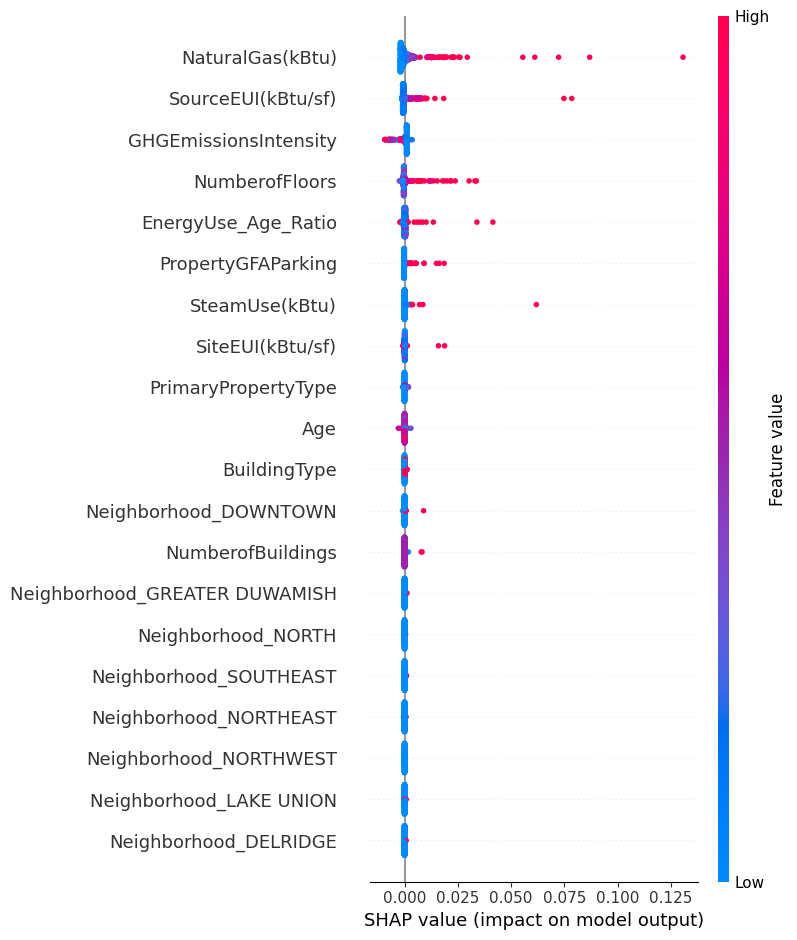

In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Séparation des caractéristiques et de la cible
X = df_scaled_without_energystarscore.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df_scaled_without_energystarscore['SiteEnergyUse(kBtu)']

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# Entraînement du modèle
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

# Calcul des valeurs SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualisation
shap.summary_plot(shap_values, X_test)

# Analyse des features importance locale avec SHAP pour le TotalGHGEmissions

 94%|=================== | 473/505 [00:11<00:00]       

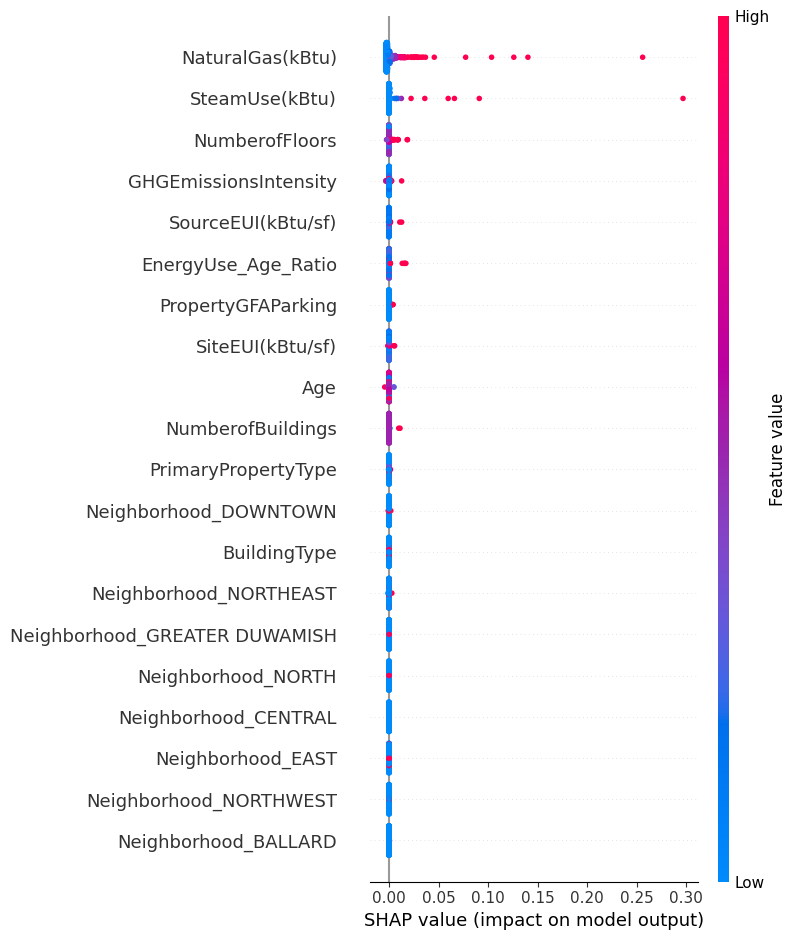

In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Séparation des caractéristiques et de la cible
X = df_scaled_without_energystarscore.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df_scaled_without_energystarscore['TotalGHGEmissions']

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# Entraînement du modèle
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

# Calcul des valeurs SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualisation
shap.summary_plot(shap_values, X_test)

## Features importance globales pour le calcul du SiteEnergyUse

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px



y = df_scaled_without_energystarscore['SiteEnergyUse(kBtu)']  # Supposition pour l'exemple
X = df_scaled_without_energystarscore.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtention de l'importance des caractéristiques
feature_importances = model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualisation de l'importance des caractéristiques avec Plotly
fig = px.bar(importances_df.sort_values('Importance', ascending=False), 
             x='Importance', 
             y='Feature', 
             height=800,
             title="Feature Importances using RandomForestRegressor",
             labels={'Feature':'Feature', 'Importance':'Importance'},
             orientation='h')
fig.show()


# Nos analyses des features importances locales et globales nous permettent de choisir les variables importantes

In [18]:
# create a new dataframes with columns that have an importance greater than 0.01
# columns 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'GHGEmissionsIntensity', 'NumberofBuildings', 'NumberofFloors', 'Age', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)'
df_SEU = df_scaled_without_energystarscore[['NaturalGas(kBtu)', 'SteamUse(kBtu)', 'GHGEmissionsIntensity', 'NumberofBuildings', 'NumberofFloors', 'Age', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)']]

## Features importance pour le calcul du TotalGHGEmissions

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px



y = df_scaled_without_energystarscore['TotalGHGEmissions']  # Supposition pour l'exemple
X = df_scaled_without_energystarscore.drop(columns=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'])

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtention de l'importance des caractéristiques
feature_importances = model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualisation de l'importance des caractéristiques avec Plotly
fig = px.bar(importances_df.sort_values('Importance', ascending=False), 
             x='Importance', 
             y='Feature', 
             height=800,
             title="Feature Importances using RandomForestRegressor",
             labels={'Feature':'Feature', 'Importance':'Importance'},
             orientation='h')
fig.show()


# Nos analyses des features importances locales et globales nous permettent de choisir les variables importantes

In [20]:
# create a new dataframe, with data from df_scaled_without_energystarscore with columns that have an importance greater than 0.01

df_TGE = df_scaled_without_energystarscore[['NaturalGas(kBtu)', 'SteamUse(kBtu)', 'GHGEmissionsIntensity', 'NumberofBuildings', 'NumberofFloors', 'Age', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions']]

## Nous avons maintenant nos deux datasets sur lesquels nous allons créer nos modèles
- Pour SiteEnergyUse, nous avons le dataset df_SEU
- Pour TotalGHGEmissions, nous avons le data df_TGE

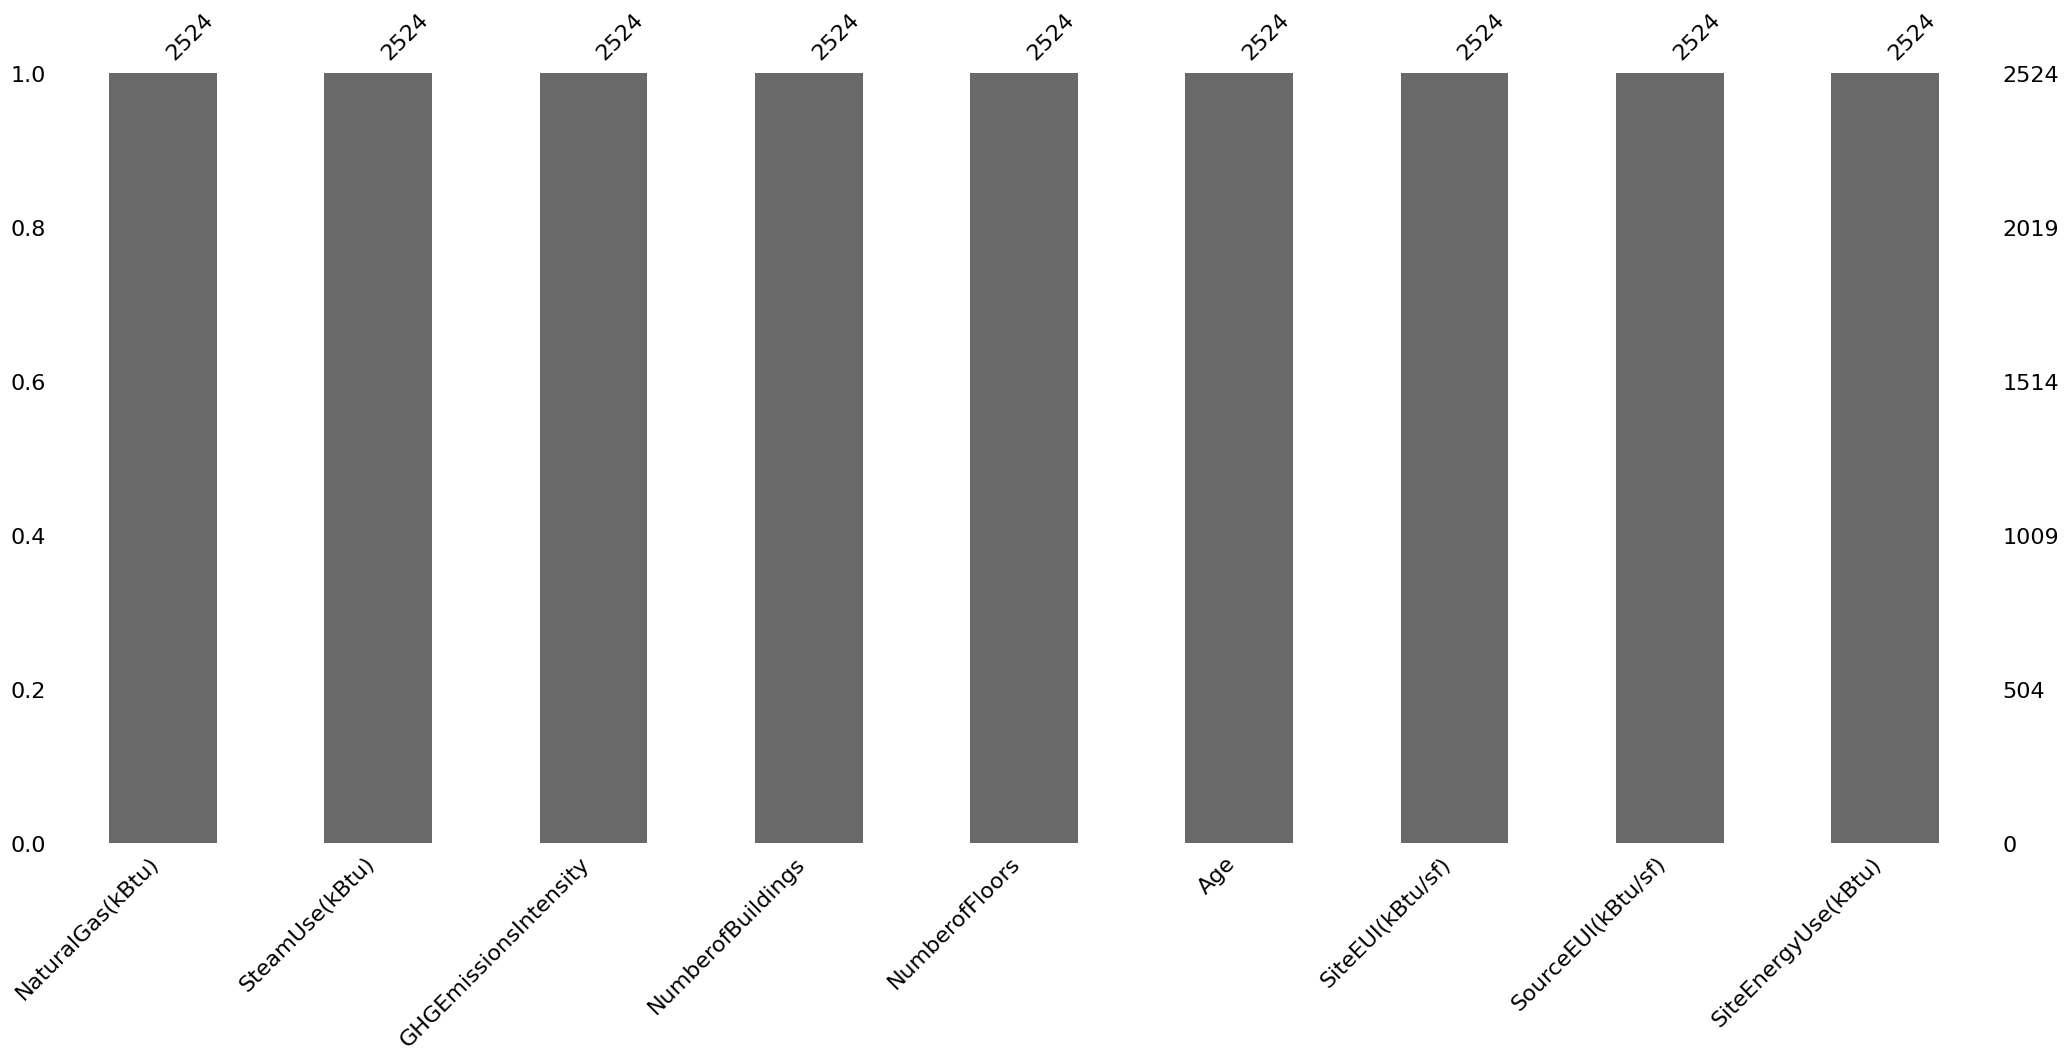

In [21]:
DataAnalysis.show_columns_population(df_SEU, type="bar")

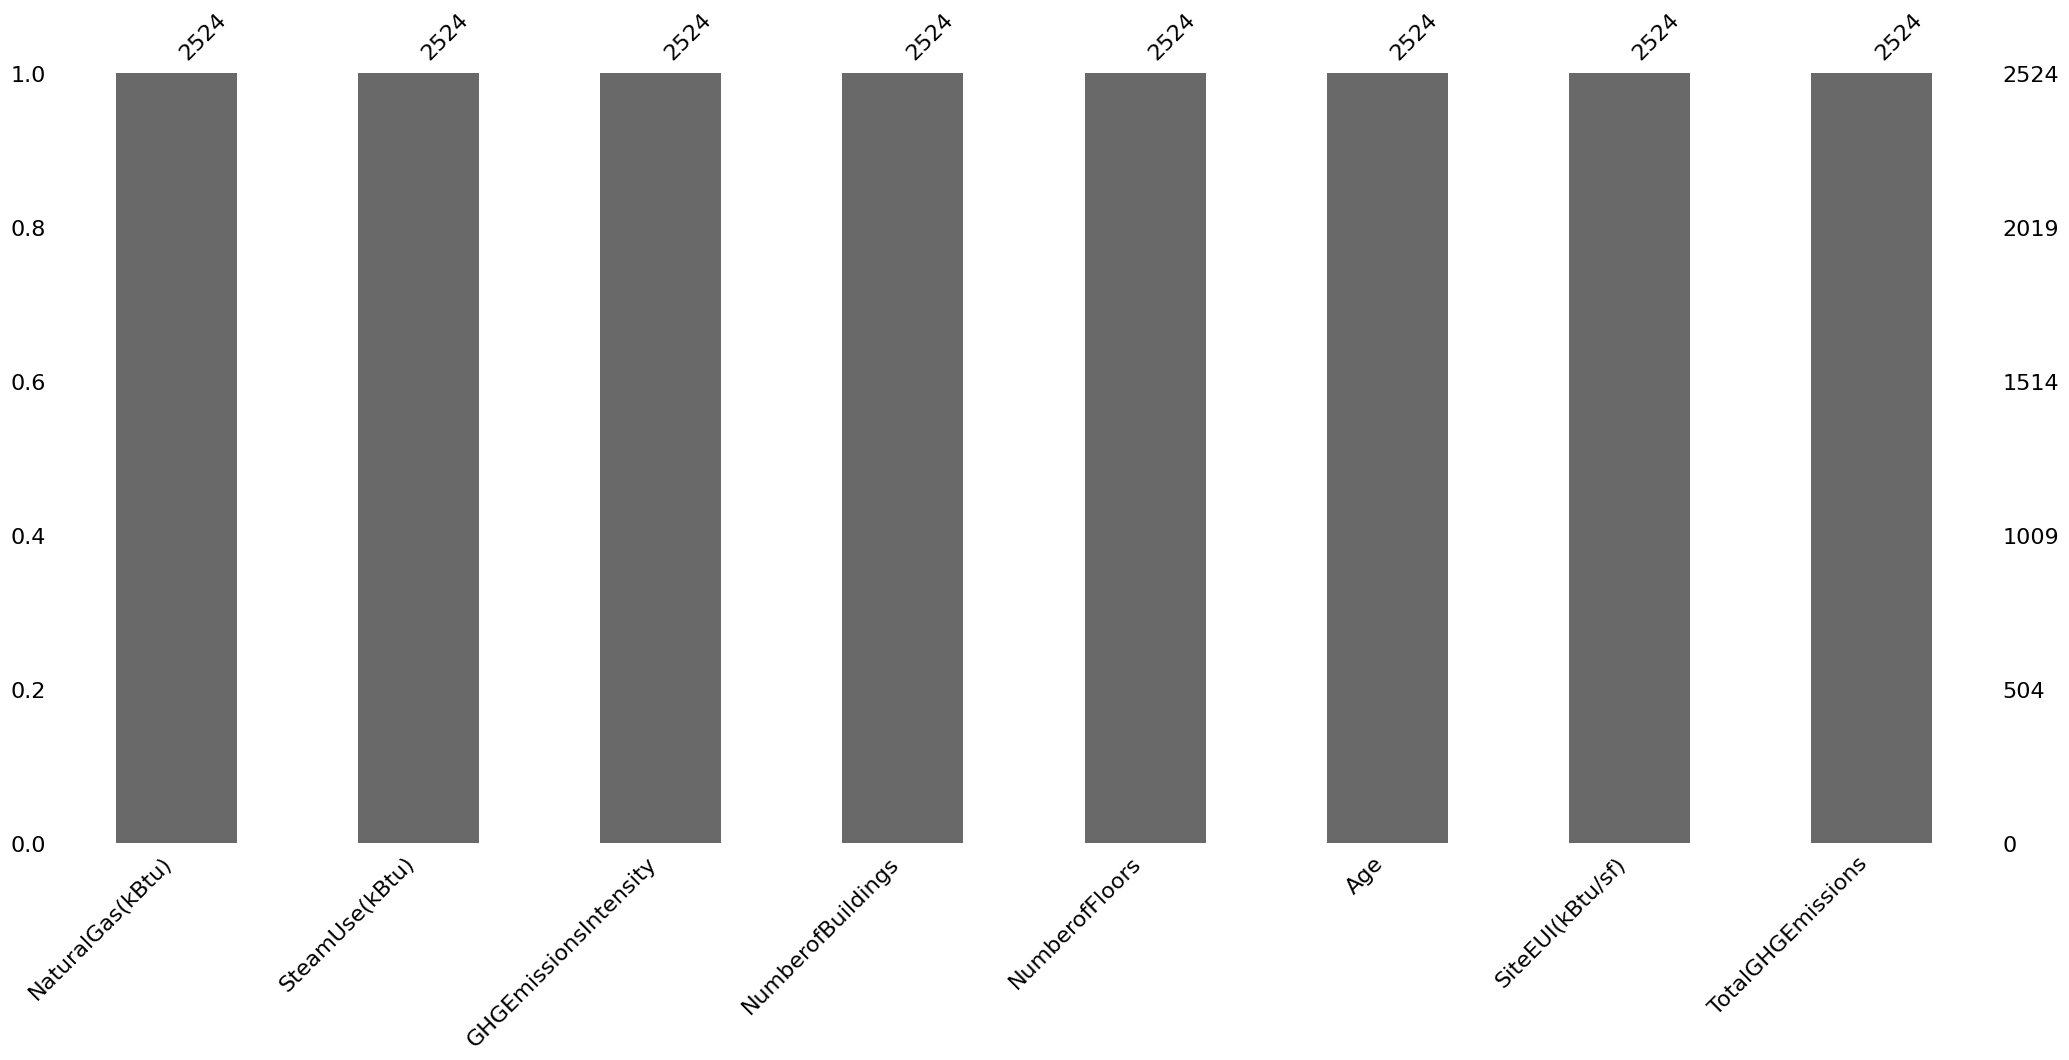

In [22]:
DataAnalysis.show_columns_population(df_TGE, type="bar")

# Nos datasets sont prêts pour l'exploration des modèles consécutive. Il n'y a pas de valeur manquante, les valeurs sont normalisées, nous avons pris en compte l'importance des variables et leur correlations

## Nous avons 2524 observations pour chacun des datasets.

In [23]:
df_TGE.to_csv('data/df_TGE.csv', index=False)
df_SEU.to_csv('data/df_SEU.csv', index=False)